In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [5]:
# Load CSV file
df = pd.read_csv('airbnb.csv')

# Display first few rows
df.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
# Shape and data types
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics
df.describe(include='all')


Shape of dataset: (74111, 29)

Data types:
 id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.411100e+04,74111.000000,74111,74111,74111,74111.000000,73911.000000,74111,74111,74111,...,74111.000000,74111.000000,74111,67239,74111.000000,57389.000000,65895,73143,74020.000000,73980.000000
unique,NaN,NaN,35,3,67122,NaN,NaN,5,5,2,...,NaN,NaN,73331,619,NaN,NaN,65883,668,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,NaN,NaN,#NAME?,Williamsburg,NaN,NaN,https://a0.muscache.com/im/pictures/70087089/b...,11211,NaN,NaN
freq,NaN,NaN,49003,41310,586,NaN,NaN,72028,32374,54403,...,NaN,NaN,10,2862,NaN,NaN,3,1618,NaN,NaN
mean,1.126662e+07,4.782069,NaN,NaN,NaN,3.155146,1.235263,NaN,NaN,NaN,...,38.445958,-92.397525,NaN,NaN,20.900568,94.067365,NaN,NaN,1.265793,1.710868
std,6.081735e+06,0.717394,NaN,NaN,NaN,2.153589,0.582044,NaN,NaN,NaN,...,3.080167,21.705322,NaN,NaN,37.828641,7.836556,NaN,NaN,0.852143,1.254142
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,33.338905,-122.511500,NaN,NaN,0.000000,20.000000,NaN,NaN,0.000000,0.000000
25%,6.261964e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,34.127908,-118.342374,NaN,NaN,1.000000,92.000000,NaN,NaN,1.000000,1.000000
50%,1.225415e+07,4.709530,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,40.662138,-76.996965,NaN,NaN,6.000000,96.000000,NaN,NaN,1.000000,1.000000
75%,1.640226e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,40.746096,-73.954660,NaN,NaN,23.000000,100.000000,NaN,NaN,1.000000,2.000000


In [8]:

# Missing values count
missing = df.isnull().sum()

# Display missing values
missing[missing > 0].sort_values(ascending=False)

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Fill numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Final check
print("Remaining missing values:", df.isnull().sum().sum())



Remaining missing values: 0


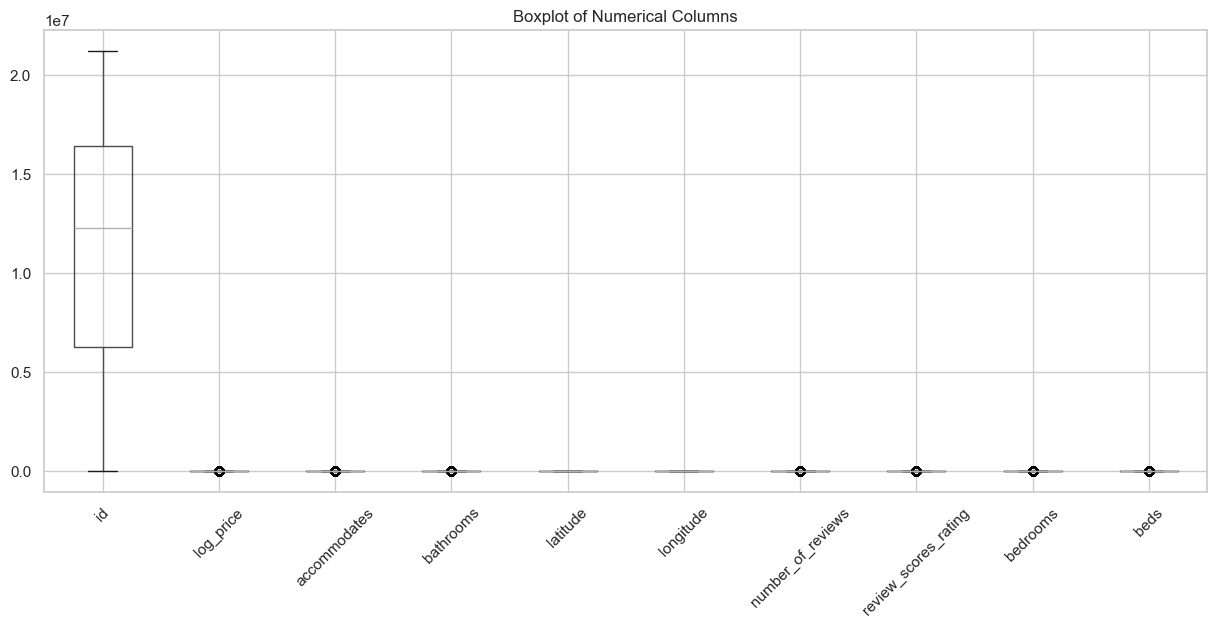

In [13]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


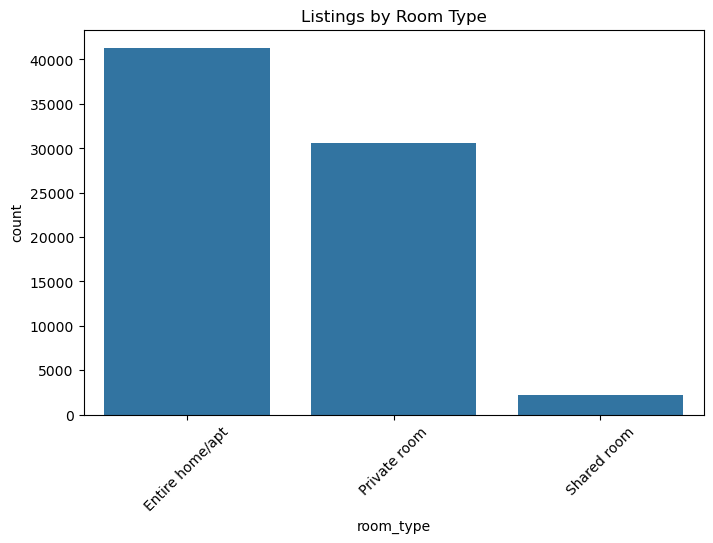

In [10]:
# Count of listings by room type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Listings by Room Type')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Drop rows where price is 0 or unusually high (if not already cleaned)
df = df[df['log_price'] > 0]
df = df[df['log_price'] < df['log_price'].quantile(0.99)]  # remove top 1% outliers

# Define target variable
y = df['log_price']

# Drop unneeded or target columns from features
X = df.drop(['price', 'id', 'name', 'host_name'], axis=1, errors='ignore')

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [19]:
# Preprocessing: OneHotEncode categorical, passthrough numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline: Preprocessing + Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['log_price', 'accommodates',
                                                   'bathrooms', 'latitude',
                                                   'longitude',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['property_type', 'room_type',
                                                   'amenities', 'bed_type',
                                                   'cancellation_policy',
                                                   'city', 'description',
                                                   'first_review',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'host_since',
                                                   'instant_bookable',
                                                   'last_review',
                                                   'neighbourhood',
                                                   'thumbnail_url',
                                                   'zipcode'])])),
                ('regressor', LinearRegression())])

In [11]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.00
✅ MAE: 0.00
✅ R² Score: 1.0000


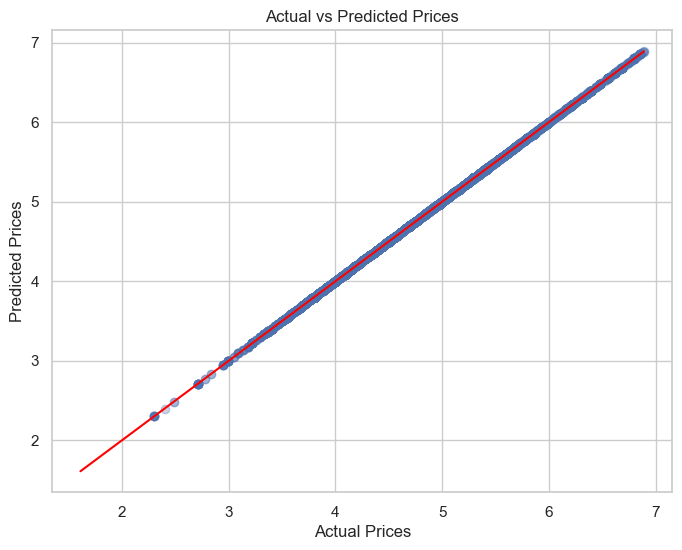

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # identity line
plt.show()
